# PFAS/Teflon 

### Member 1 :David Luis Hiraldo-Panchana
Member 2: Andres Almaraz
Client: Fred Sieling 

Our goal was to find trends that will allow us to find PFAS/Teflon in US and GA. It is a manufactured chemical that can cause serious health issues if it enters a person's blood system. Teflon which can contain a chemical of PFAS and can be found on materials like nonstick pan or water repellent clothing. The chemical can never fully go away since it stays wherever it is left whether it is in the air, water, or someone’s body. In addition to our goal we want to be able to prevent any harm to people from PFAS at any site and find the offenders causing it.

## Datasets

Andres' datasets

UCMR3_All.csv 
(This dataset holds PFAS data from the years 2013-2016 from every state and other chemicals that have been found in the water systems)

PFAS_2013-2014.csv
PFAS_2015_2015.csv (Both these datasets tested people's blood systems across the US and recorded the amount of each PFAS type found in each person)

David's datasets

WaterPro.csv 
(This Database holds water sample taken from the year 2016 from Georgia, this database focuses heavily on the counties within Georgia )


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

ucmr3_df = pd.read_csv("/work/UCMR3_All.csv")

# Andres' Part

## UCMR3 Dataset

### Breaking Down to Region and into only PFAS chemicals

In [2]:
pfas_ucmr = ucmr3_df[ucmr3_df['Contaminant'].str.startswith('PF')]
pfas_ucmr

PWSID                          PWSName Size  FacilityID  \
1        MI0004370                  City of Midland    L        6197   
8        MI0004370                  City of Midland    L        6197   
10       MI0004370                  City of Midland    L        6197   
11       MI0004370                  City of Midland    L        6197   
12       MI0004370                  City of Midland    L        6197   
...            ...                              ...  ...         ...   
1045417  UTAH03001                Nibley City Water    S       90006   
1045418  AZ0408001             Oatman Water Company    S       90001   
1045419  AZ0408001             Oatman Water Company    S       90001   
1045420  PA1090128  Doylestown Twp. Muni. Authority    S       90007   
1045421  PA1090128  Doylestown Twp. Muni. Authority    S       90007   

                  FacilityName FacilityWaterType SamplePointID  \
1        Water Treatment Plant                SW         TP001   
8        Water Treatment Plant                SW         TP001   
10       Water Treatment Plant                SW         TP001   
11       Water Treatment Plant                SW         TP001   
12       Water Treatment Plant                SW         TP001   
...                        ...               ...           ...   
1045417            Nelson Well                GW         WS006   
1045418                Well #1                GW       EPDS001   
1045419                Well #1                GW       EPDS001   
1045420        Cross Keys Well                GW         EP007   
1045421        Cross Keys Well                GW         EP007   

                   SamplePointName SamplePointType  AssociatedFacilityID  ...  \
1        Water Treatment Plant Tap              EP                4674.0  ...   
8        Water Treatment Plant Tap              EP                4674.0  ...   
10       Water Treatment Plant Tap              EP                4674.0  ...   
11       Water Treatment Plant Tap              EP                4674.0  ...   
12       Water Treatment Plant Tap              EP                4674.0  ...   
...                            ...             ...                   ...  ...   
1045417                 Sample Tap              EP               99001.0  ...   
1045418         Finished Tap Water              EP               99001.0  ...   
1045419         Finished Tap Water              EP               99001.0  ...   
1045420              CKeys EP #113              EP               99002.0  ...   
1045421              CKeys EP #113              EP               99002.0  ...   

               SampleID Contaminant   MRL MethodID  AnalyticalResultsSign  \
1        201403130319AM        PFOS  0.04  EPA 537                      <   
8        201403130319AM        PFOA  0.02  EPA 537                      <   
10       201403130319AM        PFNA  0.02  EPA 537                      <   
11       201403130319AM       PFHpA  0.01  EPA 537                      <   
12       201403130319AM       PFHxS  0.03  EPA 537                      <   
...                 ...         ...   ...      ...                    ...   
1045417         117031R        PFOA  0.02  EPA 537                      <   
1045418         106540Q        PFOA  0.02  EPA 537                      =   
1045419         109398P        PFOA  0.02  EPA 537                      =   
1045420         109567R        PFOA  0.02  EPA 537                      =   
1045421         104905P        PFOA  0.02  EPA 537                      =   

        AnalyticalResultValue SampleEventCode  MonitoringRequirement Region  \
1                         NaN             SE3                     AM      5   
8                         NaN             SE3                     AM      5   
10                        NaN             SE3                     AM      5   
11                        NaN             SE3                     AM      5   
12                        NaN             SE3                 

In [3]:
pfas_confirmed = pfas_ucmr.dropna(axis=0)
pfas_confirmed

PWSID                          PWSName Size  FacilityID  \
3310     MI0005370              Plainfield Township    L        5448   
3391     MI0005370              Plainfield Township    L        5448   
5025     MN1020001                            Anoka    L          13   
11052    ME0091410           Sanford Water District    L        1799   
11067    ME0091410           Sanford Water District    L        1799   
...            ...                              ...  ...         ...   
1042156  AZ0408001             Oatman Water Company    S       90001   
1045418  AZ0408001             Oatman Water Company    S       90001   
1045419  AZ0408001             Oatman Water Company    S       90001   
1045420  PA1090128  Doylestown Twp. Muni. Authority    S       90007   
1045421  PA1090128  Doylestown Twp. Muni. Authority    S       90007   

               FacilityName FacilityWaterType SamplePointID  \
3310        Treatment Plant                GU         TP100   
3391        Treatment Plant                GU         TP100   
5025     Treatment Plant #7                GW           E06   
11052     Treatment Plant 5                GW           TP5   
11067     Treatment Plant 5                GW           TP5   
...                     ...               ...           ...   
1042156             Well #1                GW       EPDS001   
1045418             Well #1                GW       EPDS001   
1045419             Well #1                GW       EPDS001   
1045420     Cross Keys Well                GW         EP007   
1045421     Cross Keys Well                GW         EP007   

                  SamplePointName SamplePointType  AssociatedFacilityID  ...  \
3310          Treatment Plant Tap              EP                5004.0  ...   
3391          Treatment Plant Tap              EP                5004.0  ...   
5025     Treatment Plant #7 EPTDS              EP                  21.0  ...   
11052        EPTDS Eagle Drive #1              EP                8541.0  ...   
11067        EPTDS Eagle Drive #1              EP                8541.0  ...   
...                           ...             ...                   ...  ...   
1042156        Finished Tap Water              EP               99001.0  ...   
1045418        Finished Tap Water              EP               99001.0  ...   
1045419        Finished Tap Water              EP               99001.0  ...   
1045420             CKeys EP #113              EP               99002.0  ...   
1045421             CKeys EP #113              EP               99002.0  ...   

             SampleID Contaminant   MRL MethodID  AnalyticalResultsSign  \
3310          2897547        PFOS  0.04  EPA 537                      =   
3391          2850296        PFOS  0.04  EPA 537                      =   
5025     K1410103-001       PFHpA  0.01  EPA 537                      =   
11052         2806665       PFHxS  0.03  EPA 537                      =   
11067         2806665        PFOS  0.04  EPA 537                      =   
...               ...         ...   ...      ...                    ...   
1042156       106540Q        PFOS  0.04  EPA 537                      =   
1045418       106540Q        PFOA  0.02  EPA 537                      =   
1045419       109398P        PFOA  0.02  EPA 537                      =   
1045420       109567R        PFOA  0.02  EPA 537                      =   
1045421       104905P        PFOA  0.02  EPA 537                      =   

        AnalyticalResultValue SampleEventCode  MonitoringRequirement Region  \
3310                  0.06000             SE2                     AM      5   
3391                  0.05000             SE1                     AM      5   
5025                  0.01550             SE2                     AM      5   
11052                 0.11000             SE1                     AM      1   
11067                 0.29000             SE1                     AM      1   
...                       ...             ...          

## Hypothesis Test 1.
Is there an indicator in finding PFAS in the water?


### US

In [4]:
pfas_us = ucmr3_df.dropna(axis=0)
pfas_us = pfas_us[pfas_us['Contaminant'].str.startswith('PF')]
pfas_us = pfas_us.drop(['FacilityID', 'Region', 'State', 'SamplePointID', 'SamplePointType', 'Size', 'AssociatedSamplePointID', 'SampleID', 'MethodID', 'SampleEventCode', 'MonitoringRequirement', 'SamplePointName', 'FacilityWaterType'], axis = 1)

pfas_us

PWSID                          PWSName        FacilityName  \
3310     MI0005370              Plainfield Township     Treatment Plant   
3391     MI0005370              Plainfield Township     Treatment Plant   
5025     MN1020001                            Anoka  Treatment Plant #7   
11052    ME0091410           Sanford Water District   Treatment Plant 5   
11067    ME0091410           Sanford Water District   Treatment Plant 5   
...            ...                              ...                 ...   
1042156  AZ0408001             Oatman Water Company             Well #1   
1045418  AZ0408001             Oatman Water Company             Well #1   
1045419  AZ0408001             Oatman Water Company             Well #1   
1045420  PA1090128  Doylestown Twp. Muni. Authority     Cross Keys Well   
1045421  PA1090128  Doylestown Twp. Muni. Authority     Cross Keys Well   

         AssociatedFacilityID CollectionDate Contaminant   MRL  \
3310                   5004.0      9/16/2013        PFOS  0.04   
3391                   5004.0      6/28/2013        PFOS  0.04   
5025                     21.0      9/15/2014       PFHpA  0.01   
11052                  8541.0       4/9/2013       PFHxS  0.03   
11067                  8541.0       4/9/2013        PFOS  0.04   
...                       ...            ...         ...   ...   
1042156               99001.0      4/22/2014        PFOS  0.04   
1045418               99001.0      4/22/2014        PFOA  0.02   
1045419               99001.0     10/29/2014        PFOA  0.02   
1045420               99002.0     10/14/2014        PFOA  0.02   
1045421               99002.0      2/18/2014        PFOA  0.02   

        AnalyticalResultsSign  AnalyticalResultValue  
3310                        =                0.06000  
3391                        =                0.05000  
5025                        =                0.01550  
11052                       =                0.11000  
11067                       =                0.29000  
...                       ...                    ...  
1042156                     =                0.30000  
1045418                     =                0.03000  
1045419                     =                0.03200  
1045420                     =                0.13000  
1045421                     =                0.20605  

[1152 rows x 9 columns]

In [5]:
fig = px.scatter(pfas_us, x="MRL", y="AnalyticalResultValue", color="Contaminant",
                 title="MRL vs Analyzed Result Value")
fig.show()

Since I would only be looking at PFAS that met or was above the Minimum Reporting Level, I wanted to see how much each chemical exceeded the MRL.

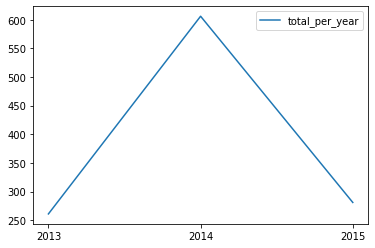

In [6]:
pfas_us_2013 = pfas_us[pfas_us['CollectionDate'].str[-4:] == '2013']
pfas_us_2014 = pfas_us[pfas_us['CollectionDate'].str[-4:] == '2014']
pfas_us_2015 = pfas_us[pfas_us['CollectionDate'].str[-4:] == '2015']
pfas_over_years = pd.DataFrame({'total_per_year' : [pfas_us_2013.shape[0], pfas_us_2014.shape[0], pfas_us_2015.shape[0]]}, index = [2013, 2014, 2015]) 
pfas_over_years.plot(xticks = [2013, 2014, 2015])
plt.show()

#### Comparing Chemicals to PFAS

In [7]:
test_year = pfas_us.copy()
test_year['CollectionDate'] = pd.to_datetime(test_year['CollectionDate'])
test_year

PWSID                          PWSName        FacilityName  \
3310     MI0005370              Plainfield Township     Treatment Plant   
3391     MI0005370              Plainfield Township     Treatment Plant   
5025     MN1020001                            Anoka  Treatment Plant #7   
11052    ME0091410           Sanford Water District   Treatment Plant 5   
11067    ME0091410           Sanford Water District   Treatment Plant 5   
...            ...                              ...                 ...   
1042156  AZ0408001             Oatman Water Company             Well #1   
1045418  AZ0408001             Oatman Water Company             Well #1   
1045419  AZ0408001             Oatman Water Company             Well #1   
1045420  PA1090128  Doylestown Twp. Muni. Authority     Cross Keys Well   
1045421  PA1090128  Doylestown Twp. Muni. Authority     Cross Keys Well   

         AssociatedFacilityID CollectionDate Contaminant   MRL  \
3310                   5004.0     2013-09-16        PFOS  0.04   
3391                   5004.0     2013-06-28        PFOS  0.04   
5025                     21.0     2014-09-15       PFHpA  0.01   
11052                  8541.0     2013-04-09       PFHxS  0.03   
11067                  8541.0     2013-04-09        PFOS  0.04   
...                       ...            ...         ...   ...   
1042156               99001.0     2014-04-22        PFOS  0.04   
1045418               99001.0     2014-04-22        PFOA  0.02   
1045419               99001.0     2014-10-29        PFOA  0.02   
1045420               99002.0     2014-10-14        PFOA  0.02   
1045421               99002.0     2014-02-18        PFOA  0.02   

        AnalyticalResultsSign  AnalyticalResultValue  
3310                        =                0.06000  
3391                        =                0.05000  
5025                        =                0.01550  
11052                       =                0.11000  
11067                       =                0.29000  
...                       ...                    ...  
1042156                     =                0.30000  
1045418                     =                0.03000  
1045419                     =                0.03200  
1045420                     =                0.13000  
1045421                     =                0.20605  

[1152 rows x 9 columns]

<AxesSubplot:title={'center':'Amount of PFAS through 2013-2016'}>

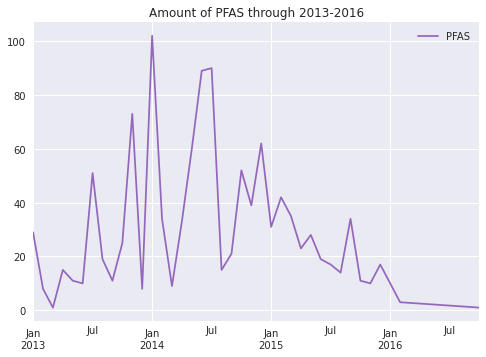

In [8]:
plt.style.use('seaborn')
test_year_pf = pfas_us.copy()
test_year_pf['CollectionDate'] = pd.to_datetime(test_year_pf['CollectionDate'])
b_p = test_year_pf.groupby(test_year_pf.CollectionDate.dt.to_period("M")).agg('Contaminant')
c_p = b_p.apply(pd.DataFrame)
d_p = c_p.notnull().sum()
#d_p.title('Amount of PFAS through 2013-2016')
d_p.plot(legend = True, label = 'PFAS', color = "tab:purple", title ='Amount of PFAS through 2013-2016')

In [9]:
non_pfas_us = ucmr3_df.dropna(axis=0)
non_pfas_us = non_pfas_us[non_pfas_us['Contaminant'].str.startswith('PF') != True]
non_pfas_us = non_pfas_us.drop(['FacilityID', 'Region', 'State', 'SamplePointID', 'SamplePointType', 'Size', 'AssociatedSamplePointID', 'SampleID', 'MethodID', 'SampleEventCode', 'MonitoringRequirement', 'SamplePointName', 'FacilityWaterType'], axis = 1)
non_pfas_us

PWSID                  PWSName           FacilityName  \
0        MI0004370          City of Midland  Water Treatment Plant   
6        MI0004370          City of Midland  Water Treatment Plant   
23       MI0004370          City of Midland  Water Treatment Plant   
24       MI0004370          City of Midland  Water Treatment Plant   
25       MI0004370          City of Midland  Water Treatment Plant   
...            ...                      ...                    ...   
1012611  PA1460059           SCI Graterford                Well #5   
1012612  MA3254000  Rowley Water Department                Well #2   
1012613  MA3254000  Rowley Water Department                Well #2   
1012614  PA1460059           SCI Graterford                Well #7   
1012615  PA1460059           SCI Graterford                Well #7   

         AssociatedFacilityID CollectionDate Contaminant   MRL  \
0                      4674.0      3/11/2014   strontium  0.30   
6                      4674.0      3/11/2014    chromium  0.20   
23                     4674.0     12/11/2013  chromium-6  0.03   
24                     4674.0      3/11/2014  chromium-6  0.03   
25                     4674.0     12/11/2013    chromium  0.20   
...                       ...            ...         ...   ...   
1012611               99001.0      7/22/2013     HCFC-22  0.08   
1012612               99001.0       8/5/2013     HCFC-22  0.08   
1012613               99001.0       2/4/2013     HCFC-22  0.08   
1012614               99002.0      1/23/2013     HCFC-22  0.08   
1012615               99002.0      7/22/2013     HCFC-22  0.08   

        AnalyticalResultsSign  AnalyticalResultValue  
0                           =                 98.000  
6                           =                  0.230  
23                          =                  0.290  
24                          =                  0.230  
25                          =                  0.300  
...                       ...                    ...  
1012611                     =                  0.970  
1012612                     =                  1.200  
1012613                     =                  2.495  
1012614                     =                  5.825  
1012615                     =                  7.100  

[147907 rows x 9 columns]

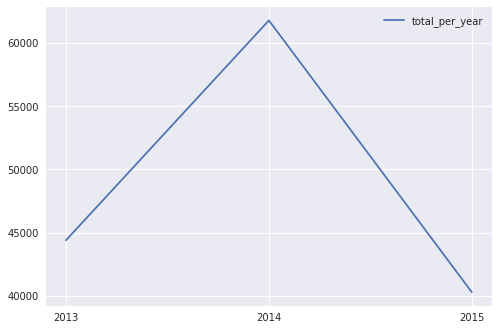

In [10]:
non_pfas_us_2013 = non_pfas_us[non_pfas_us['CollectionDate'].str[-4:] == '2013']
non_pfas_us_2014 = non_pfas_us[non_pfas_us['CollectionDate'].str[-4:] == '2014']
non_pfas_us_2015 = non_pfas_us[non_pfas_us['CollectionDate'].str[-4:] == '2015']
non_pfas_over_yrs = pd.DataFrame({'total_per_year' : [non_pfas_us_2013.shape[0], non_pfas_us_2014.shape[0], non_pfas_us_2015.shape[0]]}, index = [2013, 2014, 2015]) 
non_pfas_over_yrs.plot(xticks = [2013, 2014, 2015])
plt.show()

<AxesSubplot:title={'center':'Amount of Non-PFAS chemicals in 2013-2016'}>

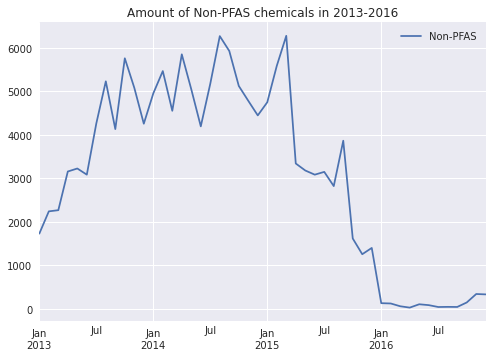

In [11]:
test_year = non_pfas_us.copy()
test_year['CollectionDate'] = pd.to_datetime(test_year['CollectionDate'])
b = test_year.groupby(test_year.CollectionDate.dt.to_period("M")).agg('Contaminant')
c = b.apply(pd.DataFrame)
d = c.notnull().sum()
d.plot(legend = True, label = 'Non-PFAS', title ='Amount of Non-PFAS chemicals in 2013-2016')

In [12]:
d_p.name = "PFAS"
names = np.array(["PFAS"])
count_test = pd.concat([d_p], axis = 1)

In [13]:
test_year = non_pfas_us.copy()
test_year['CollectionDate'] = pd.to_datetime(test_year['CollectionDate'])
for x in test_year['Contaminant'].unique():
    a = test_year[test_year['Contaminant'] == x].copy()
    b = a.groupby(a.CollectionDate.dt.to_period("M")).agg('Contaminant')
    c = b.apply(pd.DataFrame)
    d = c.notnull().sum()
    d.name = x
    names = np.append(names, x)
    count_test = count_test.join(d)
count_test #nan need values

PFAS  strontium  chromium  chromium-6  vanadium  chlorate  \
2013-01    29        444       146         297       234       238   
2013-02     8        567       238         413       315       290   
2013-03     1        585       232         377       330       299   
2013-04    15        776       420         575       517       363   
2013-05    11        770       378         555       472       442   
2013-06    10        754       425         525       464       373   
2013-07    51       1056       482         788       660       547   
2013-08    19       1231       626         932       817       703   
2013-09    11       1051       422         743       610       572   
2013-10    25       1406       709        1069       941       696   
2013-11    73       1269       633         881       729       656   
2013-12     8       1114       485         781       566       583   
2014-01   102       1271       539         920       708       644   
2014-02    34       1322       655         988       747       778   
2014-03     9       1169       504         838       600       661   
2014-04    33       1478       697        1044       881       799   
2014-05    60       1326       588         914       717       662   
2014-06    89       1059       416         761       596       630   
2014-07    90       1280       634         904       783       668   
2014-08    15       1436       917        1111       923       844   
2014-09    21       1404       783        1079       819       830   
2014-10    52       1241       726         916       749       696   
2014-11    39       1159       683         885       623       641   
2014-12    62       1133       653         749       645       543   
2015-01    31       1217       641         850       660       610   
2015-02    42       1370       793         994       849       684   
2015-03    35       1602       881        1159       909       767   
2015-04    23        866       432         620       458       451   
2015-05    28        800       469         594       474       361   
2015-06    19        784       406         558       496       362   
2015-07    17        781       409         570       482       380   
2015-08    14        688       330         510       425       383   
2015-09    34        955       551         752       632       440   
2015-10    11        417       196         276       249       220   
2015-11    10        308       151         230       190       134   
2015-12    17        363       169         277       195       177   
2016-02     3         29        25          17        32         6   
2016-10     1         35        13          34        37        15   

         molybdenum  1,1-dichloroethane  1,4-dioxane  Halon 1011  ...  \
2013-01         175                11.0           82         6.0  ...   
2013-02         233                11.0           52         4.0  ...   
2013-03         252                31.0           76         5.0  ...   
2013-04         318                17.0           88         6.0  ...   
2013-05         367                19.0          117         9.0  ...   
2013-06         331                27.0           76        19.0  ...   
2013-07         418                25.0          131        22.0  ...   
2013-08         574                29.0          106        41.0  ...   
2013-09         439                34.0          118        31.0  ...   
2013-10         598                34.0          144        32.0  ...   
2013-11         543                39.0          150        42.0  ...   
2013-12         448                33.0          135        12.0  ...   
2014-01         516                39.0          145        21.0  ...   
2014-02         601                26.0          156        12.0  ...   
2014-03         470                27.0          127        22.0  ...   
2014-04         570                30.0          163        39.0  ...   
2014-05         506                21

In [14]:
count_test = count_test.fillna(0)
count_test 

PFAS  strontium  chromium  chromium-6  vanadium  chlorate  \
2013-01    29        444       146         297       234       238   
2013-02     8        567       238         413       315       290   
2013-03     1        585       232         377       330       299   
2013-04    15        776       420         575       517       363   
2013-05    11        770       378         555       472       442   
2013-06    10        754       425         525       464       373   
2013-07    51       1056       482         788       660       547   
2013-08    19       1231       626         932       817       703   
2013-09    11       1051       422         743       610       572   
2013-10    25       1406       709        1069       941       696   
2013-11    73       1269       633         881       729       656   
2013-12     8       1114       485         781       566       583   
2014-01   102       1271       539         920       708       644   
2014-02    34       1322       655         988       747       778   
2014-03     9       1169       504         838       600       661   
2014-04    33       1478       697        1044       881       799   
2014-05    60       1326       588         914       717       662   
2014-06    89       1059       416         761       596       630   
2014-07    90       1280       634         904       783       668   
2014-08    15       1436       917        1111       923       844   
2014-09    21       1404       783        1079       819       830   
2014-10    52       1241       726         916       749       696   
2014-11    39       1159       683         885       623       641   
2014-12    62       1133       653         749       645       543   
2015-01    31       1217       641         850       660       610   
2015-02    42       1370       793         994       849       684   
2015-03    35       1602       881        1159       909       767   
2015-04    23        866       432         620       458       451   
2015-05    28        800       469         594       474       361   
2015-06    19        784       406         558       496       362   
2015-07    17        781       409         570       482       380   
2015-08    14        688       330         510       425       383   
2015-09    34        955       551         752       632       440   
2015-10    11        417       196         276       249       220   
2015-11    10        308       151         230       190       134   
2015-12    17        363       169         277       195       177   
2016-02     3         29        25          17        32         6   
2016-10     1         35        13          34        37        15   

         molybdenum  1,1-dichloroethane  1,4-dioxane  Halon 1011  ...  \
2013-01         175                11.0           82         6.0  ...   
2013-02         233                11.0           52         4.0  ...   
2013-03         252                31.0           76         5.0  ...   
2013-04         318                17.0           88         6.0  ...   
2013-05         367                19.0          117         9.0  ...   
2013-06         331                27.0           76        19.0  ...   
2013-07         418                25.0          131        22.0  ...   
2013-08         574                29.0          106        41.0  ...   
2013-09         439                34.0          118        31.0  ...   
2013-10         598                34.0          144        32.0  ...   
2013-11         543                39.0          150        42.0  ...   
2013-12         448                33.0          135        12.0  ...   
2014-01         516                39.0          145        21.0  ...   
2014-02         601                26.0          156        12.0  ...   
2014-03         470                27.0          127        22.0  ...   
2014-04         570                30.0          163        39.0  ...   
2014-05         506                21

In [15]:
fig = px.scatter_matrix(count_test, dimensions=names[0:5])

fig.update_traces(diagonal_visible=False)
fig.show()

In [16]:
names = np.delete(names, [1,2,3,4])
count_test = count_test.drop(count_test.iloc[:,1:5], axis = 1)
fig = px.scatter_matrix(count_test, dimensions=names[0:5])

fig.update_traces(diagonal_visible=False)
fig.show()

In [17]:
names = np.delete(names, [1,2,3,4])
count_test = count_test.drop(count_test.iloc[:,1:5], axis = 1)
fig = px.scatter_matrix(count_test, dimensions=names[0:5])

fig.update_traces(diagonal_visible=False)
fig.show()

In [18]:
names = np.delete(names, [1,2,3,4])
count_test = count_test.drop(count_test.iloc[:,1:5], axis = 1)
fig = px.scatter_matrix(count_test, dimensions=names[0:5])

fig.update_traces(diagonal_visible=False)
fig.show()

In [19]:
stron = test_year[test_year['Contaminant'] == 'strontium'].copy()
b = stron.groupby(stron.CollectionDate.dt.to_period("M")).agg('Contaminant')
c = b.apply(pd.DataFrame)
stron_grph = c.notnull().sum()

chr6 = test_year[test_year['Contaminant'] == 'chromium-6'].copy()
b = chr6.groupby(chr6.CollectionDate.dt.to_period("M")).agg('Contaminant')
c = b.apply(pd.DataFrame)
chr6_grph = c.notnull().sum()

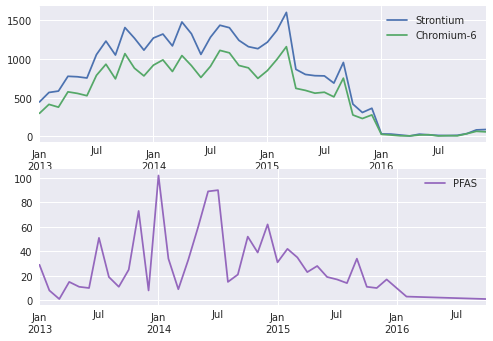

In [20]:
fig = plt.figure()  
ax = fig.add_subplot(2,1,1)
stron_grph.plot(legend = True, label = 'Strontium')
chr6_grph.plot(legend = True, label = 'Chromium-6')
ax2 = fig.add_subplot(2,1,2)
d_p.plot(legend = True, label = 'PFAS', color = "tab:purple")
plt.show()

In [21]:
vana = test_year[test_year['Contaminant'] == 'vanadium']
b = vana.groupby(vana.CollectionDate.dt.to_period("M")).agg('Contaminant')
c = b.apply(pd.DataFrame)
vana_grph = c.notnull().sum()

chlora = test_year[test_year['Contaminant'] == 'chlorate']
b = chlora.groupby(chlora.CollectionDate.dt.to_period("M")).agg('Contaminant')
c = b.apply(pd.DataFrame)
chlora_grph = c.notnull().sum()

chromi = test_year[test_year['Contaminant'] == 'chromium']
b = chromi.groupby(chromi.CollectionDate.dt.to_period("M")).agg('Contaminant')
c = b.apply(pd.DataFrame)
chromi_grph = c.notnull().sum()

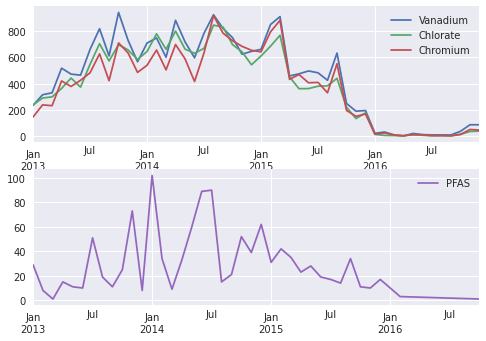

In [22]:
fig = plt.figure()  
ax = fig.add_subplot(2,1,1)
vana_grph.plot(legend = True, label = 'Vanadium')
chlora_grph.plot(legend = True, label = 'Chlorate')
chromi_grph.plot(legend = True, label = 'Chromium')
ax2 = fig.add_subplot(2,1,2)
d_p.plot(legend = True, label = 'PFAS', color = "tab:purple")
plt.show()

After seeing how PFAS very loosely could maybe correlate with all the other chemicals, I decided I should break it down to test it even further.

In [23]:
PFOA = pfas_us[pfas_us['Contaminant'].str.startswith('PFOA')]
PFOA = PFOA.dropna(axis=0)
non_PFOA_us = non_pfas_us[non_pfas_us['PWSName'].isin(PFOA['PWSName'])]

test_PFOA = PFOA.copy()
test_PFOA['CollectionDate'] = pd.to_datetime(test_PFOA['CollectionDate'])
b_p = test_PFOA.groupby(test_PFOA.CollectionDate.dt.to_period("M")).agg('Contaminant')
c_p = b_p.apply(pd.DataFrame)
d_p = c_p.notnull().sum()

d_p.name = "PFOA"
name_PFOA = np.array(["PFOA"])
count_PFOA = pd.concat([d_p], axis = 1)

test_non_PFOA = non_PFOA_us.copy()
test_non_PFOA['CollectionDate'] = pd.to_datetime(test_non_PFOA['CollectionDate'])
for x in test_non_PFOA['Contaminant'].unique():
    a = test_non_PFOA[test_non_PFOA['Contaminant'] == x].copy()
    b = a.groupby(a.CollectionDate.dt.to_period("M")).agg('Contaminant')
    c = b.apply(pd.DataFrame)
    d = c.notnull().sum()
    d.name = x
    name_PFOA = np.append(name_PFOA, x)
    count_PFOA = count_PFOA.join(d)

In [24]:
coef = []
i = 0
for (na, pf) in count_PFOA.iloc[:, 0:1].iteritems():
    pf = np.array(pf, dtype=int)
    x = pf.reshape(-1, 1)
    coef.append([na])
    for (na2, non) in count_PFOA.iloc[:, 1:].iteritems():
        non = np.array(non, dtype=int)
        y = non.reshape(-1, 1)
        model = LinearRegression().fit(x, y)
        y_pred = model.predict(x)
        r_sq = model.score(x, y)
        coef[i].append(r_sq)
    i += 1
coef

[['PFOA',
  0.6364823041823645,
  0.5728306598231729,
  0.5237629225758,
  0.032288588905901694,
  0.6200780825149868,
  0.039183093009430126,
  0.19091818925127024,
  0.6094819529341079,
  0.06619243008847497,
  0.2807161924300885,
  0.2294403580962152,
  0.00010074786556080184,
  0.019786030942371413,
  0.0001981652231690667,
  0.014021732348038496,
  0.02445958345337018,
  0.03138970440076616,
  0.0160607084989568]]

Using Linear Regression I made a loop that would check each different PFAS with all the other chemicals. Here only PFOA is shown since that was the one with the only namely results. The were three chemicals found with higher than 0.6 being chromium-6, vanadium, and chromate.

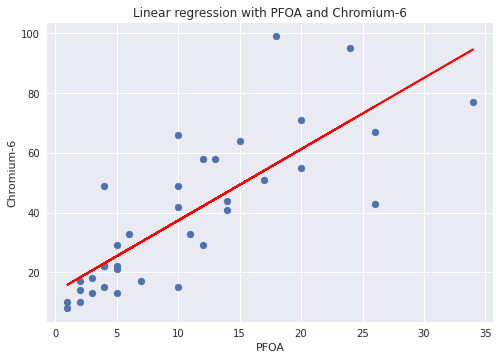

In [25]:
x = count_PFOA.iloc[:, 0].values.reshape(-1, 1)
y = count_PFOA.iloc[:, 1].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)
r_sq = model.score(x, y)
plt.scatter(x, y)
plt.xlabel('PFOA') 
plt.ylabel('Chromium-6')
plt.title('Linear regression with PFOA and Chromium-6')
plt.plot(x, y_pred, color='red')
plt.show()

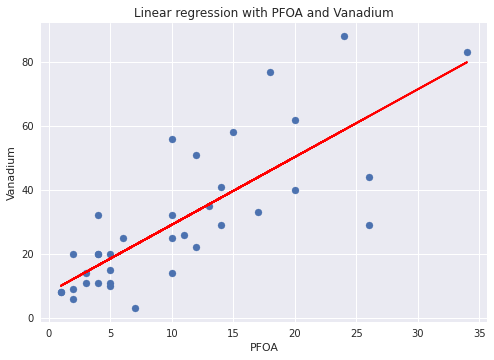

In [26]:
x = count_PFOA.iloc[:, 0].values.reshape(-1, 1)
y = count_PFOA.iloc[:, 5].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)
r_sq = model.score(x, y)
plt.scatter(x, y)
plt.xlabel('PFOA') 
plt.ylabel('Vanadium')
plt.title('Linear regression with PFOA and Vanadium')
plt.plot(x, y_pred, color='red')
plt.plot(x, y_pred, color='red')
plt.show()

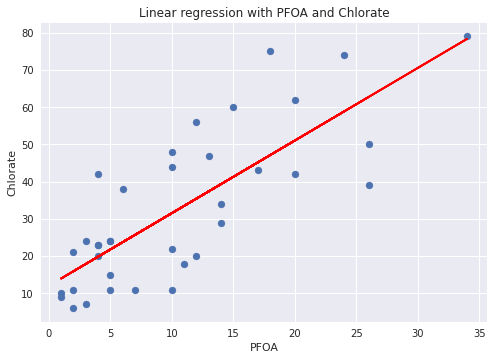

In [27]:
x = count_PFOA.iloc[:, 0].values.reshape(-1, 1)
y = count_PFOA.iloc[:, 8].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)
r_sq = model.score(x, y)
plt.scatter(x, y)
plt.xlabel('PFOA') 
plt.ylabel('Chlorate')
plt.title('Linear regression with PFOA and Chlorate')
plt.plot(x, y_pred, color='red')
plt.plot(x, y_pred, color='red')
plt.show()

In [28]:
fig = px.scatter_3d(count_PFOA, x='PFOA', y='chlorate', z='vanadium')
fig.show()

In [29]:
fig = px.scatter_3d(count_PFOA, x='PFOA', y='chromium-6', z='chlorate')
fig.show()

In [30]:
fig = px.scatter_3d(count_PFOA, x='PFOA', y='chromium-6', z='vanadium')
fig.show()

For all three 3D plots, a R squared of about 0.63 was found for them. That leads me to believe that they are all correlated to each other. That would mean that the presence of vanadium, chromate, and chromium-6 could likely mean that there are traces of PFOA in the water systems.

### US Recorded States with PFAS

In [31]:
usa_cpy = pfas_confirmed.drop(['FacilityID', 'SamplePointID', 'SamplePointType', 'Size', 'AssociatedSamplePointID', 'SampleID', 'MethodID', 'SampleEventCode', 'MonitoringRequirement', 'SamplePointName', 'FacilityWaterType'], axis = 1)
usa_cpy['CollectionDate'] = pd.to_datetime(usa_cpy['CollectionDate'])
usa_cpy

PWSID                          PWSName        FacilityName  \
3310     MI0005370              Plainfield Township     Treatment Plant   
3391     MI0005370              Plainfield Township     Treatment Plant   
5025     MN1020001                            Anoka  Treatment Plant #7   
11052    ME0091410           Sanford Water District   Treatment Plant 5   
11067    ME0091410           Sanford Water District   Treatment Plant 5   
...            ...                              ...                 ...   
1042156  AZ0408001             Oatman Water Company             Well #1   
1045418  AZ0408001             Oatman Water Company             Well #1   
1045419  AZ0408001             Oatman Water Company             Well #1   
1045420  PA1090128  Doylestown Twp. Muni. Authority     Cross Keys Well   
1045421  PA1090128  Doylestown Twp. Muni. Authority     Cross Keys Well   

         AssociatedFacilityID CollectionDate Contaminant   MRL  \
3310                   5004.0     2013-09-16        PFOS  0.04   
3391                   5004.0     2013-06-28        PFOS  0.04   
5025                     21.0     2014-09-15       PFHpA  0.01   
11052                  8541.0     2013-04-09       PFHxS  0.03   
11067                  8541.0     2013-04-09        PFOS  0.04   
...                       ...            ...         ...   ...   
1042156               99001.0     2014-04-22        PFOS  0.04   
1045418               99001.0     2014-04-22        PFOA  0.02   
1045419               99001.0     2014-10-29        PFOA  0.02   
1045420               99002.0     2014-10-14        PFOA  0.02   
1045421               99002.0     2014-02-18        PFOA  0.02   

        AnalyticalResultsSign  AnalyticalResultValue  Region State  
3310                        =                0.06000       5    MI  
3391                        =                0.05000       5    MI  
5025                        =                0.01550       5    MN  
11052                       =                0.11000       1    ME  
11067                       =                0.29000       1    ME  
...                       ...                    ...     ...   ...  
1042156                     =                0.30000       9    AZ  
1045418                     =                0.03000       9    AZ  
1045419                     =                0.03200       9    AZ  
1045420                     =                0.13000       3    PA  
1045421                     =                0.20605       3    PA  

[1152 rows x 11 columns]

In [32]:
usa_grp = usa_cpy.groupby([usa_cpy['CollectionDate'].dt.year, usa_cpy['State']]).agg('Contaminant')
usa_years = pd.DataFrame(usa_grp.size().reset_index(name = "Count"))
usa_pivot = usa_years.pivot(index = ['State'], columns = ['CollectionDate'], values = ['Count'])
usa_pivot.columns = usa_pivot.columns.droplevel()
mod_usa = usa_pivot.rename_axis(None, axis = 1)
mod_usa = mod_usa.reset_index()
fin_usa = mod_usa.fillna(0)
fin_usa

State  2013   2014  2015  2016
0      9   0.0    0.0   3.0   0.0
1     AL  19.0   41.0  29.0   0.0
2     AS   0.0    0.0   1.0   0.0
3     AZ  12.0   34.0   1.0   0.0
4     CA  40.0   68.0  25.0   0.0
5     CO  43.0  163.0   0.0   0.0
6     DE  14.0   23.0   1.0   0.0
7     FL   2.0   41.0   7.0   0.0
8     GA   1.0    1.0  37.0   0.0
9     GU   0.0    0.0  19.0   0.0
10    IL   2.0    3.0   0.0   0.0
11    IN   0.0    2.0   0.0   0.0
12    KS   0.0    0.0   1.0   0.0
13    KY   4.0    0.0   0.0   0.0
14    MA  25.0   18.0   4.0   0.0
15    MD   1.0    0.0   0.0   0.0
16    ME   4.0    1.0   0.0   0.0
17    MI   2.0    1.0   0.0   0.0
18    MN   2.0    7.0  22.0   0.0
19    MP   0.0    0.0  18.0   3.0
20    NC  16.0   25.0  12.0   0.0
21    NH   0.0    6.0   2.0   0.0
22    NJ  24.0   36.0  62.0   0.0
23    NM   1.0    0.0   0.0   0.0
24    NY   8.0   37.0   6.0   0.0
25    OH   0.0    8.0   9.0   0.0
26    OK   0.0    0.0   4.0   0.0
27    PA  27.0   60.0   4.0   0.0
28    PR   0.0    0.0   0.0   1.0
29    RI   0.0    0.0   3.0   0.0
30    SC   0.0    2.0   0.0   0.0
31    SD   0.0    2.0   0.0   0.0
32    TN   1.0    0.0   1.0   0.0
33    TX   6.0    1.0   0.0   0.0
34    VA   0.0    2.0   0.0   0.0
35    WA   5.0   10.0   0.0   0.0
36    WI   2.0    6.0   0.0   0.0
37    WV   0.0    8.0  10.0   0.0

In [33]:
fig = px.choropleth(fin_usa, locations='State', locationmode="USA-states", scope="usa", color=2013, range_color=(0, 50))
fig.show()

In [34]:
fig = px.choropleth(fin_usa, locations='State', locationmode="USA-states", scope="usa", color=2014, range_color=(0, 80))
fig.show()

Seeing that Colorado had a high amount of recorded PFAS, I wanted to see where they were being found in the state. Which I was able to find that they were mainly being found in the wells.

In [35]:
usa_colo = usa_cpy.copy()
usa_colo['CollectionDate'] = usa_colo['CollectionDate'].astype('str') 
usa_colo[(usa_colo['CollectionDate'].str.startswith('2014')) & (usa_colo['State'] == 'CO')]

PWSID        PWSName                  FacilityName  \
245044  CO0121775   Security WSD  CT 150,000 Gallon Steel Tank   
245047  CO0121775   Security WSD  CT 150,000 Gallon Steel Tank   
245055  CO0121775   Security WSD       Chlorinator for W9 Well   
245057  CO0121775   Security WSD       Chlorinator for W9 Well   
245060  CO0121775   Security WSD  CT 150,000 Gallon Steel Tank   
...           ...            ...                           ...   
248507  CO0121900  Widefield WSD       Chlorinator for W4 Well   
248514  CO0121900  Widefield WSD       Chlorinator for E2 Well   
248515  CO0121900  Widefield WSD       Chlorinator for E2 Well   
248517  CO0121900  Widefield WSD       Chlorinator for E2 Well   
248528  CO0121900  Widefield WSD       Chlorinator for W4 Well   

        AssociatedFacilityID CollectionDate Contaminant   MRL  \
245044               99001.0     2014-01-22       PFHxS  0.03   
245047               99001.0     2014-01-22        PFOA  0.02   
245055                6706.0     2014-01-15        PFOS  0.04   
245057                6706.0     2014-01-15        PFOA  0.02   
245060               99001.0     2014-01-22        PFOS  0.04   
...                      ...            ...         ...   ...   
248507                6715.0     2014-05-19       PFHpA  0.01   
248514                6715.0     2014-05-14        PFOA  0.02   
248515                6715.0     2014-05-14        PFOS  0.04   
248517                6715.0     2014-05-14       PFHpA  0.01   
248528                6715.0     2014-05-19        PFOS  0.04   

       AnalyticalResultsSign  AnalyticalResultValue  Region State  
245044                     =                  0.380       8    CO  
245047                     =                  0.070       8    CO  
245055                     =                  1.300       8    CO  
245057                     =                  0.070       8    CO  
245060                     =                  0.060       8    CO  
...                      ...                    ...     ...   ...  
248507                     =                  0.024       8    CO  
248514                     =                  0.036       8    CO  
248515                     =                  0.180       8    CO  
248517                     =                  0.020       8    CO  
248528                     =                  0.051       8    CO  

[163 rows x 11 columns]

In [36]:
fig = px.choropleth(fin_usa, locations='State', locationmode="USA-states", scope="usa", color=2015, range_color=(0, 50))
fig.show()

## Hypothesis Test 2.
If there is a rise of people exposed to PFAS across the US

In [37]:
blood13_14 = pd.read_csv("/work/PFAS_2013-2014.csv")
blood15_16 = pd.read_csv("/work/PFAS_2015-2016.csv")
blood13_14

SEQN        WTSB2YR LBXPFDE LBDPFDEL LBXPFHS LBDPFHSL LBXMPAH LBDMPAHL  \
0     73568  270133.488619     0.2        0       3        0     0.2        0   
1     73571  138554.659645     0.3        0       2        0     0.2        0   
2     73574   46186.186645     0.1        0     0.2        0    0.07        1   
3     73576   37460.999852     0.2        0     7.6        0    0.07        1   
4     73577  128174.418941     0.1        0     1.2        0    0.07        1   
...     ...            ...     ...      ...     ...      ...     ...      ...   
2188  83711   82946.684281    0.07        1     0.6        0     0.2        0   
2189  83713   49551.258249     0.9        0     1.1        0    0.07        1   
2190  83717   29856.202622     0.2        0     1.4        0    0.07        1   
2191  83723   35010.256954    0.07        1     1.7        0    0.07        1   
2192  83726  143483.796028       .        .       .        .       .        .   

     LBXPFBS LBDPFBSL LBXPFHP LBDPFHPL LBXPFNA LBDPFNAL LBXPFUA LBDPFUAL  \
0       0.07        1    0.07        1     0.5        0     0.1        0   
1       0.07        1    0.07        1     1.3        0    0.07        1   
2       0.07        1    0.07        1     0.7        0    0.07        1   
3       0.07        1     0.2        0     0.6        0    0.07        1   
4       0.07        1    0.07        1     0.4        0    0.07        1   
...      ...      ...     ...      ...     ...      ...     ...      ...   
2188    0.07        1    0.07        1     0.3        0    0.07        1   
2189    0.07        1    0.07        1     1.5        0     0.5        0   
2190    0.07        1    0.07        1     0.8        0    0.07        1   
2191    0.07        1    0.07        1     0.3        0    0.07        1   
2192       .        .       .        .       .        .       .        .   

     LBXPFDO LBDPFDOL  
0       0.07        1  
1       0.07        1  
2       0.07        1  
3        0.1        0  
4       0.07        1  
...      ...      ...  
2188    0.07        1  
2189     0.3        0  
2190    0.07        1  
2191    0.07        1  
2192       .        .  

[2193 rows x 18 columns]

In [38]:
tp_of_pfas = pfas_us['Contaminant'].unique()
tp_of_pfas = tp_of_pfas.astype('str')
tp_of_pfas

array(['PFOS', 'PFHpA', 'PFHxS', 'PFOA', 'PFNA', 'PFBS'], dtype='<U5')

In [39]:
b13_14 = blood13_14[['LBDPFNAL', 'LBDPFBSL']]
b13 = b13_14[b13_14['LBDPFNAL'] != 1]

In [40]:
for x in tp_of_pfas:
    for col in blood15_16.columns:
        if x in col:
            print(col)

LBXPFNA
LBDPFNAL


I only checked for the PFAS chemical that our data contained to see possibly make a connection between the datasets. The only one found in both was PFNA.

In [41]:
b15_16 = blood15_16[blood15_16['LBDPFNAL'] != 1]
b15_16['LBDPFNAL'].count()

2035

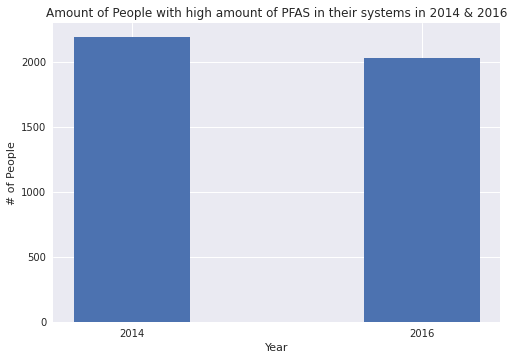

In [42]:
fig, ax = plt.subplots()
tt = pd.DataFrame({'Contaminated People' : [b13.shape[0], b15_16.shape[0]], 'Year' :[2014, 2016]}, index = [2013, 2016]) 
plt.bar(tt['Year'], tt['Contaminated People'])
ax.set_xticks([2014, 2016])
ax.set_xlabel('Year')
ax.set_ylabel('# of People')
ax.set_title('Amount of People with high amount of PFAS in their systems in 2014 & 2016')
plt.show()

There is not much of a change here so I believe that there is not enough of a difference to be able to say. This was the furthest that we would be able to go since the data did not keep track of time.

# David's Part

This is where I will be testing my 2 hypothesis where it will be focusing primairly on Ga

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [44]:
water = pd.read_csv("WaterPro.csv")
water.head(10)

PWS ID                       PWS Name                PWS Type  \
0  GA2610011         A B C MOBILE HOME PARK  Community water system   
1  GA1830006         AARON MOBILE HOME PARK  Community water system   
2  GA3150000                      ABBEVILLE  Community water system   
3  GA2770004  ABRAHAM BALDWIN AGRI. COLLEGE  Community water system   
4  GA1850009      ACADEMY ACRES SUBDIVISION  Community water system   
5  GA0150000                    ADAIRSVILLE  Community water system   
6  GA0750000                           ADEL  Community water system   
7  GA1070000                         ADRIAN  Community water system   
8  GA2090000                          AILEY  Community water system   
9  GA3090000                          ALAMO  Community water system   

                                 Primary Source Counties Served Cities Served  \
0                                  Ground water          Sumter           NaN   
1                                  Ground water            Long           NaN   
2                                  Ground water          Wilcox           NaN   
3                                  Ground water            Tift        TIFTON   
4                                  Ground water         Lowndes      VALDOSTA   
5  Groundwater under influence of surface water          Bartow   ADAIRSVILLE   
6                                  Ground water            Cook          ADEL   
7                                  Ground water         Emanuel        ADRIAN   
8                                  Ground water      Montgomery         AILEY   
9                                  Ground water         Wheeler         ALAMO   

  PopulationServed Count  Number of Facilities  Number of Violations  \
0                     75                     6                   115   
1                    112                     4                    23   
2                  2,960                    10                    15   
3                  4,086                     5                    26   
4                    325                     6                     6   
5                  7,306                     6                    13   
6                  6,560                    12                     3   
7                    664                     6                    14   
8                    537                     6                    24   
9                  3,650                     6                    21   

   Number of Site Visits  
0                      5  
1                      8  
2                      4  
3                      5  
4                      5  
5                     26  
6                      5  
7                      6  
8                      6  
9                      6

In [45]:
water_t = water.set_index('Counties Served').select_dtypes('number')
water_t.head()

Number of Facilities  Number of Violations  \
Counties Served                                               
Sumter                              6                   115   
Long                                4                    23   
Wilcox                             10                    15   
Tift                                5                    26   
Lowndes                             6                     6   

                 Number of Site Visits  
Counties Served                         
Sumter                               5  
Long                                 8  
Wilcox                               4  
Tift                                 5  
Lowndes                              5

In [46]:
idx = water_t.idxmax()
idx

Number of Facilities     Dougherty
Number of Violations         Grady
Number of Site Visits    Habersham
dtype: object

In [47]:
water_t.loc[idx]

Number of Facilities  Number of Violations  \
Counties Served                                               
Dougherty                          77                    20   
Dougherty                           4                     7   
Dougherty                           4                     8   
Dougherty                           4                     7   
Dougherty                           6                     4   
Dougherty                           9                    12   
Dougherty                           5                     3   
Grady                               8                     3   
Grady                              18                    14   
Grady                               4                    15   
Grady                               4                    24   
Grady                               6                    11   
Grady                               7                   523   
Grady                               4                    16   
Grady                               5                    15   
Grady                               5                    35   
Grady                               6                    18   
Grady                               8                     7   
Grady                               4                     6   
Grady                               4                     5   
Grady                               4                     7   
Grady                               4                     8   
Grady                               3                     0   
Habersham                          38                    20   
Habersham                          13                    27   
Habersham                           4                    11   
Habersham                          11                     7   
Habersham                           4                     0   
Habersham                          11                    28   
Habersham                           4                    34   
Habersham                           4                     0   
Habersham                          16                    24   
Habersham                           4                     0   
Habersham                           6                     6   
Habersham                           7                     0   
Habersham                           3                     0   
Habersham                          16                    19   
Habersham                           6                    65   
Habersham                           4                    14   
Habersham                           2                     3   
Habersham                           5                     0   

                 Number of Site Visits  
Counties Served                         
Dougherty                           24  
Dougherty                            4  
Dougherty                            6  
Dougherty                            4  
Dougherty                            4  
Dougherty                            4  
Dougherty                            5  
Grady                                6  
Grady                                5  
Grady                                4  
Grady                                5  
Grady                                4  
Grady                                6  
Grady                                8  
Grady                                5  
Grady                                6  
Grady                                5  
Grady                                5  
Grady                                4  
Grady                                4  
Grady                                4  
Grady                                4  
Grady                                1  
Habersham                            5  
Habersham                           52  
Habersham                           46  
Habersham                           70  
Habersham                            3  
Habersham                            7  
Habersham                           

In [48]:
water_t = water.set_index(['Counties Served','PWS Name','PWS ID','Primary Source','PopulationServed Count']).select_dtypes('number')
water_t.head()

Number of Facilities  \
Counties Served PWS Name                      PWS ID    Primary Source PopulationServed Count                         
Sumter          A B C MOBILE HOME PARK        GA2610011 Ground water   75                                         6   
Long            AARON MOBILE HOME PARK        GA1830006 Ground water   112                                        4   
Wilcox          ABBEVILLE                     GA3150000 Ground water   2,960                                     10   
Tift            ABRAHAM BALDWIN AGRI. COLLEGE GA2770004 Ground water   4,086                                      5   
Lowndes         ACADEMY ACRES SUBDIVISION     GA1850009 Ground water   325                                        6   

                                                                                               Number of Violations  \
Counties Served PWS Name                      PWS ID    Primary Source PopulationServed Count                         
Sumter          A B C MOBILE HOME PARK        GA2610011 Ground water   75                                       115   
Long            AARON MOBILE HOME PARK        GA1830006 Ground water   112                                       23   
Wilcox          ABBEVILLE                     GA3150000 Ground water   2,960                                     15   
Tift            ABRAHAM BALDWIN AGRI. COLLEGE GA2770004 Ground water   4,086                                     26   
Lowndes         ACADEMY ACRES SUBDIVISION     GA1850009 Ground water   325                                        6   

                                                                                               Number of Site Visits  
Counties Served PWS Name                      PWS ID    Primary Source PopulationServed Count                         
Sumter          A B C MOBILE HOME PARK        GA2610011 Ground water   75                                          5  
Long            AARON MOBILE HOME PARK        GA1830006 Ground water   112                                         8  
Wilcox          ABBEVILLE                     GA3150000 Ground water   2,960                                       4  
Tift            ABRAHAM BALDWIN AGRI. COLLEGE GA2770004 Ground water   4,086                                       5  
Lowndes         ACADEMY ACRES SUBDIVISION     GA1850009 Ground water   325                                         5

In [49]:
idx = water_t.idxmax()
idx

Number of Facilities     (Dougherty, ALBANY, GA0950000, Ground water, 8...
Number of Violations     (Grady, PINE TERRACE MOBILE HOME PARK, GA13100...
Number of Site Visits    (Habersham, CORNELIA, GA1370003, Surface water...
dtype: object

In [50]:
water_idx_max = water_t.loc[idx]
water_idx_max

Number of Facilities  \
Counties Served PWS Name                      PWS ID    Primary Source PopulationServed Count                         
Dougherty       ALBANY                        GA0950000 Ground water   87,261                                    77   
Grady           PINE TERRACE MOBILE HOME PARK GA1310022 Ground water   332                                        7   
Habersham       CORNELIA                      GA1370003 Surface water  6,130                                     11   

                                                                                               Number of Violations  \
Counties Served PWS Name                      PWS ID    Primary Source PopulationServed Count                         
Dougherty       ALBANY                        GA0950000 Ground water   87,261                                    20   
Grady           PINE TERRACE MOBILE HOME PARK GA1310022 Ground water   332                                      523   
Habersham       CORNELIA                      GA1370003 Surface water  6,130                                      7   

                                                                                               Number of Site Visits  
Counties Served PWS Name                      PWS ID    Primary Source PopulationServed Count                         
Dougherty       ALBANY                        GA0950000 Ground water   87,261                                     24  
Grady           PINE TERRACE MOBILE HOME PARK GA1310022 Ground water   332                                         6  
Habersham       CORNELIA                      GA1370003 Surface water  6,130                                      70

In [51]:
water_idx_max.style.highlight_max()

Hypotheis 3 
This refers to who the population may factor in the number of failities and number of violations 
Conclusion-There is a relationships between facilities, violations, and populations in Georgia: Lower populations equals more facilities


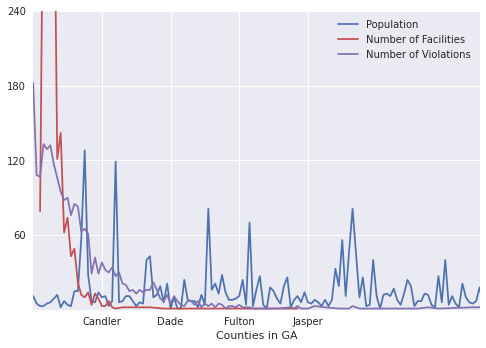

In [52]:
x = pd.DataFrame(water['Counties Served'].value_counts())

y = pd.DataFrame(water['PopulationServed Count'].value_counts())
z = pd.DataFrame(water['Number of Facilities'].value_counts())
a = pd.DataFrame(water['Number of Violations'].value_counts())


plt.xlim(0,130)
plt.ylim(0,240)
plt.plot(x.sort_index(axis = 0), label = 'Population')
plt.plot(y.sort_index(axis = 0))
plt.plot(z.sort_index(axis = 0 ), label = 'Number of Facilities')
plt.plot(a.sort_index(axis = 0 ), label = 'Number of Violations')
plt.xticks([20,40,60,80])
plt.yticks([60,120,180,240])
line1 = label= 'line1'

plt.legend()
plt.xlabel("Counties in GA")




plt.show()

In [53]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

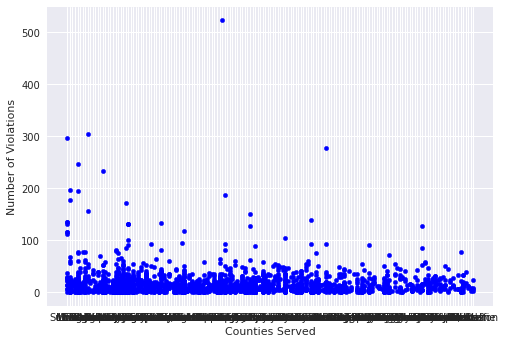

In [54]:
water.plot(kind='scatter', x='Counties Served',y='Number of Violations', color='blue')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

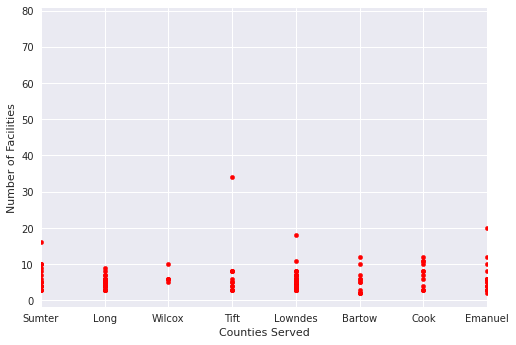

In [55]:
water.plot(kind='scatter', x='Counties Served',y='Number of Facilities', color='red')
plt.xlim(0,7)
plt.show

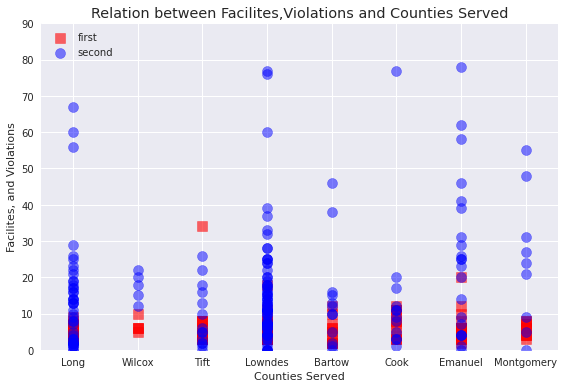

In [56]:
import matplotlib.pyplot as plt


fig = plt.figure()
ax1 = fig.add_subplot()
plt.style.use('ggplot')
plt.title('Relation between Facilites,Violations and Counties Served')
plt.xlabel('Counties Served')
plt.ylabel('Facilites, and Violations')
ax1.scatter(x=water['Counties Served'],y=water['Number of Facilities'], s=100, c='r', marker="s",alpha=0.6, label='first')
ax1.scatter(x=water['Counties Served'],y=water['Number of Violations'], s=100, c='b', marker="o",alpha=0.5, label='second')
plt.xlim(0.5,8.5)
plt.ylim(0,90)

plt.legend(loc='upper left');
plt.tight_layout()
plt.show()

## Hypothesis 4 

To see where the most traces of pfas occurred within the state of GA

In [57]:
ucmr3_df = pd.read_csv("UCMR3_All.csv")
ucmr3_df


PWSID                      PWSName Size  FacilityID  \
0        MI0004370              City of Midland    L        6197   
1        MI0004370              City of Midland    L        6197   
2        MI0004370              City of Midland    L        6197   
3        MI0004370              City of Midland    L        6197   
4        MI0004370              City of Midland    L        6197   
...            ...                          ...  ...         ...   
1048570  IL1790550                  North Pekin    S       90001   
1048571  IL1790550                  North Pekin    S       90002   
1048572  IN5219007  Huntingburg Municipal Water    S       90001   
1048573  IN5219007  Huntingburg Municipal Water    S       90002   
1048574  IN5219007  Huntingburg Municipal Water    S       90003   

                  FacilityName FacilityWaterType SamplePointID  \
0        Water Treatment Plant                SW         TP001   
1        Water Treatment Plant                SW         TP001   
2        Water Treatment Plant                SW         TP001   
3        Water Treatment Plant                SW         TP001   
4        Water Treatment Plant                SW         TP001   
...                        ...               ...           ...   
1048570                Well #2                GW         EP001   
1048571                Well #3                GW         EP002   
1048572        Huntingburg WTP                SW         EP001   
1048573         Patoka Phase I                SW         EP002   
1048574         Patoka Phase V                SW         EP003   

                   SamplePointName SamplePointType  AssociatedFacilityID  ...  \
0        Water Treatment Plant Tap              EP                4674.0  ...   
1        Water Treatment Plant Tap              EP                4674.0  ...   
2        Water Treatment Plant Tap              EP                4674.0  ...   
3        Water Treatment Plant Tap              EP                4674.0  ...   
4        Water Treatment Plant Tap              EP                4674.0  ...   
...                            ...             ...                   ...  ...   
1048570         Finished Water Tap              EP               99001.0  ...   
1048571         Finished Water Tap              EP               99001.0  ...   
1048572    EP from Huntingburg WTP              EP               99001.0  ...   
1048573                Phase 1 Pit              EP               99001.0  ...   
1048574                Phase 5 Pit              EP               99001.0  ...   

               SampleID         Contaminant   MRL   MethodID  \
0        201403130319AM           strontium  0.30  EPA 200.8   
1        201403130319AM                PFOS  0.04    EPA 537   
2        201403130319AM        bromomethane  0.20  EPA 524.3   
3        201403130319AM       chloromethane  0.20  EPA 524.3   
4        201403130319AM            vanadium  0.20  EPA 200.8   
...                 ...                 ...   ...        ...   
1048570         116266P  1,1-dichloroethane  0.03  EPA 524.3   
1048571         116267P  1,1-dichloroethane  0.03  EPA 524.3   
1048572         116268P  1,1-dichloroethane  0.03  EPA 524.3   
1048573         116269P  1,1-dichloroethane  0.03  EPA 524.3   
1048574         116270P  1,1-dichloroethane  0.03  EPA 524.3   

         AnalyticalResultsSign AnalyticalResultValue SampleEventCode  \
0                            =                  98.0             SE3   
1                            <                   NaN             SE3   
2                            <                   NaN             SE3   
3                            <                   NaN             SE3   
4                            <                   NaN             SE3   
...                        ...                   ...             ...   
1048570                      <                   NaN             SE2   
1048571                      <                   NaN             SE2   
1048572      

In [58]:
gapfas = ucmr3_df[ucmr3_df['State'].str.contains('GA')] 
gapfas

PWSID                                        PWSName Size  \
356909   GA0350051  Butts County/Jackson/Jenkinsburg Water System    L   
356910   GA0350051  Butts County/Jackson/Jenkinsburg Water System    L   
356911   GA0350051  Butts County/Jackson/Jenkinsburg Water System    L   
356912   GA0350051  Butts County/Jackson/Jenkinsburg Water System    L   
356913   GA0350051  Butts County/Jackson/Jenkinsburg Water System    L   
...            ...                                            ...  ...   
1048496  GA0510109                             Glen of Robin Hood    S   
1048497  GA0510109                             Glen of Robin Hood    S   
1048498  GA0510109                             Glen of Robin Hood    S   
1048499  GA0510109                             Glen of Robin Hood    S   
1048566  GA1070025                                  Criders, Inc.    S   

         FacilityID                 FacilityName FacilityWaterType  \
356909        10632          Distribution System                SW   
356910         2607  Gerald "Buck" Stewart Plant                SW   
356911         2607  Gerald "Buck" Stewart Plant                SW   
356912         2607  Gerald "Buck" Stewart Plant                SW   
356913         2607  Gerald "Buck" Stewart Plant                SW   
...             ...                          ...               ...   
1048496       90002                  Paxton Well                GW   
1048497       90003             Nancy Place Well                GW   
1048498       90004                  Lehigh Well                GW   
1048499       90005             Rivers Bend Well                GW   
1048566       90001               Crider Well #3                GW   

        SamplePointID           SamplePointName SamplePointType  \
356909            408           2381 Hwy. 36 E.              MR   
356910            302        Finished Water Tap              EP   
356911            302        Finished Water Tap              EP   
356912            302        Finished Water Tap              EP   
356913            302        Finished Water Tap              EP   
...               ...                       ...             ...   
1048496         EP002       EP from Paxton Well              EP   
1048497         EP003  EP from Nancy Place Well              EP   
1048498         EP004       EP from Lehigh Well              EP   
1048499         EP005  EP from Rivers Bend Well              EP   
1048566         EP001      Dispatch Office (#8)              EP   

         AssociatedFacilityID  ...     SampleID         Contaminant   MRL  \
356909                    NaN  ...  3L13020-07A              cobalt  1.00   
356910                10632.0  ...  3L13020-03A       chloromethane  0.20   
356911                10632.0  ...  3L13020-03A          molybdenum  1.00   
356912                10632.0  ...  3L13020-03A           strontium  0.30   
356913                10632.0  ...  3L13020-03A              cobalt  1.00   
...                       ...  ...          ...                 ...   ...   
1048496               99001.0  ...      116036P  1,1-dichloroethane  0.03   
1048497               99001.0  ...      116037P  1,1-dichloroethane  0.03   
1048498               99001.0  ...      116038P  1,1-dichloroethane  0.03   
1048499               99001.0  ...      116039P  1,1-dichloroethane  0.03   
1048566               99001.0  ...      116262Q  1,1-dichloroethane  0.03   

          MethodID  AnalyticalResultsSign AnalyticalResultValue  \
356909   EPA 200.8                      <                   NaN   
356910   EPA 524.3                      <                   NaN   
356911   EPA 200.8                      <                   NaN   
356912   EPA 200.8                      =                  28.0   
356913   EPA 200.8                      <                   NaN   
...            ...                    ...                   ...   
1048496  EPA 524.3                      <                   NaN   
1048497  EPA 524.

In [59]:
gap =  gapfas.set_index(['PWSID','FacilityID','FacilityName','FacilityWaterType','Contaminant','State']).select_dtypes('number')
gap

AssociatedFacilityID  \
PWSID     FacilityID FacilityName                FacilityWaterType Contaminant        State                         
GA0350051 10632      Distribution System         SW                cobalt             GA                      NaN   
          2607       Gerald "Buck" Stewart Plant SW                chloromethane      GA                  10632.0   
                                                                   molybdenum         GA                  10632.0   
                                                                   strontium          GA                  10632.0   
                                                                   cobalt             GA                  10632.0   
...                                                                                                           ...   
GA0510109 90002      Paxton Well                 GW                1,1-dichloroethane GA                  99001.0   
          90003      Nancy Place Well            GW                1,1-dichloroethane GA                  99001.0   
          90004      Lehigh Well                 GW                1,1-dichloroethane GA                  99001.0   
          90005      Rivers Bend Well            GW                1,1-dichloroethane GA                  99001.0   
GA1070025 90001      Crider Well #3              GW                1,1-dichloroethane GA                  99001.0   

                                                                                              MRL  \
PWSID     FacilityID FacilityName                FacilityWaterType Contaminant        State         
GA0350051 10632      Distribution System         SW                cobalt             GA     1.00   
          2607       Gerald "Buck" Stewart Plant SW                chloromethane      GA     0.20   
                                                                   molybdenum         GA     1.00   
                                                                   strontium          GA     0.30   
                                                                   cobalt             GA     1.00   
...                                                                                           ...   
GA0510109 90002      Paxton Well                 GW                1,1-dichloroethane GA     0.03   
          90003      Nancy Place Well            GW                1,1-dichloroethane GA     0.03   
          90004      Lehigh Well                 GW                1,1-dichloroethane GA     0.03   
          90005      Rivers Bend Well            GW                1,1-dichloroethane GA     0.03   
GA1070025 90001      Crider Well #3              GW                1,1-dichloroethane GA     0.03   

                                                                                             AnalyticalResultValue  \
PWSID     FacilityID FacilityName                FacilityWaterType Contaminant        State                          
GA0350051 10632      Distribution System         SW                cobalt             GA                       NaN   
          2607       Gerald "Buck" Stewart Plant SW                chloromethane      GA                       NaN   
                                                                   molybdenum         GA                       NaN   
                                                                   strontium          GA                      28.0   
                                                                   cobalt             GA                       NaN   
...                                                                                                            ...   
GA0510109 90002      Paxton Well                 GW                1,1-dichloroethane GA                       NaN   
          90003      Nancy Place Well            GW                1,1-dichloroethane GA                       NaN   
          90004      Lehigh Well                 GW                1,1-dichlo

In [60]:
gas = gapfas[ucmr3_df['Contaminant'].str.contains('PF')] 
gas

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



PWSID                                        PWSName Size  \
356921   GA0350051  Butts County/Jackson/Jenkinsburg Water System    L   
356925   GA0350051  Butts County/Jackson/Jenkinsburg Water System    L   
356928   GA0350051  Butts County/Jackson/Jenkinsburg Water System    L   
356929   GA0350051  Butts County/Jackson/Jenkinsburg Water System    L   
356930   GA0350051  Butts County/Jackson/Jenkinsburg Water System    L   
...            ...                                            ...  ...   
1045269  GA0510109                             Glen of Robin Hood    S   
1045270  GA0510109                             Glen of Robin Hood    S   
1045271  GA0510109                             Glen of Robin Hood    S   
1045272  GA2330002                                       Rockmart    S   
1045342  GA1070025                                  Criders, Inc.    S   

         FacilityID                 FacilityName FacilityWaterType  \
356921         2607  Gerald "Buck" Stewart Plant                SW   
356925         2607  Gerald "Buck" Stewart Plant                SW   
356928         2607  Gerald "Buck" Stewart Plant                SW   
356929         2607  Gerald "Buck" Stewart Plant                SW   
356930         2607  Gerald "Buck" Stewart Plant                SW   
...             ...                          ...               ...   
1045269       90003             Nancy Place Well                GW   
1045270       90004                  Lehigh Well                GW   
1045271       90005             Rivers Bend Well                GW   
1045272       90001            Rockmart Plant #1                GU   
1045342       90001               Crider Well #3                GW   

        SamplePointID            SamplePointName SamplePointType  \
356921            302         Finished Water Tap              EP   
356925            302         Finished Water Tap              EP   
356928            302         Finished Water Tap              EP   
356929            302         Finished Water Tap              EP   
356930            302         Finished Water Tap              EP   
...               ...                        ...             ...   
1045269         EP003   EP from Nancy Place Well              EP   
1045270         EP004        EP from Lehigh Well              EP   
1045271         EP005   EP from Rivers Bend Well              EP   
1045272         EP001  EP from Rockmart Plant #1              EP   
1045342         EP001       Dispatch Office (#8)              EP   

         AssociatedFacilityID  ...     SampleID Contaminant   MRL MethodID  \
356921                10632.0  ...  3L13020-03A        PFOA  0.02  EPA 537   
356925                10632.0  ...  3L13020-03A        PFNA  0.02  EPA 537   
356928                10632.0  ...  3L13020-03A        PFOS  0.04  EPA 537   
356929                10632.0  ...  3L13020-03A       PFHxS  0.03  EPA 537   
356930                10632.0  ...  3L13020-03A       PFHpA  0.01  EPA 537   
...                       ...  ...          ...         ...   ...      ...   
1045269               99001.0  ...      116037P        PFOA  0.02  EPA 537   
1045270               99001.0  ...      116038P        PFOA  0.02  EPA 537   
1045271               99001.0  ...      116039P        PFOA  0.02  EPA 537   
1045272               99001.0  ...      116040P        PFOA  0.02  EPA 537   
1045342               99001.0  ...      116262Q        PFOA  0.02  EPA 537   

         AnalyticalResultsSign AnalyticalResultValue SampleEventCode  \
356921                       <                   NaN             SE4   
356925                       <                   NaN             SE4   
356928                       <                   NaN             SE4   
356929                       <                   NaN             SE4   
356930                       <                   NaN             SE4   
...                        ...                   ...             ...   
1045269                  

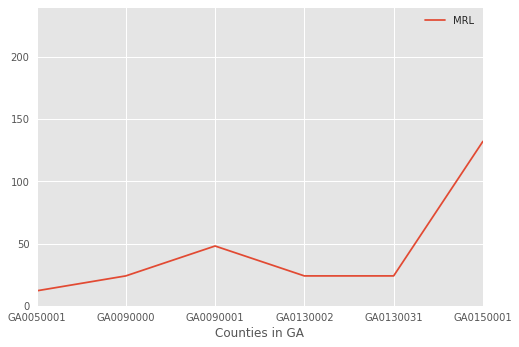

In [61]:
x = pd.DataFrame(gas['PWSID'].value_counts())

y = pd.DataFrame(gas['MRL'].value_counts())
plt.xlim(0,5)
plt.ylim(0,240)
plt.plot(x.sort_index(axis = 0), label = 'MRL')
plt.plot(y.sort_index(axis = 0))
plt.legend()
plt.xlabel("Counties in GA")




plt.show()

(75.0, 100.0)

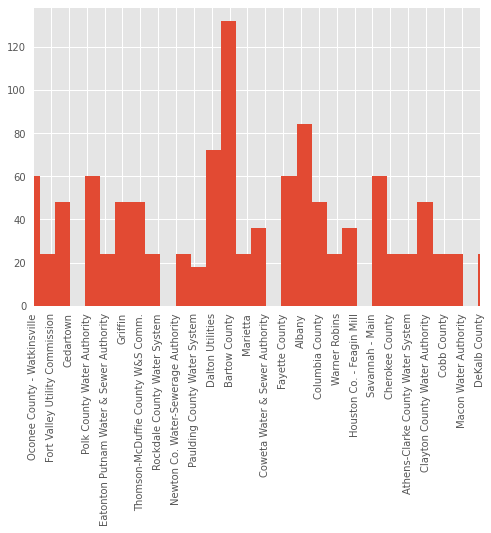

In [62]:
gas["PWSName"].hist(bins=150,xrot=90)
plt.xlim(75,100)


Hypothesis
Where did PFAS occur most in Georgia in 2016?
Conclusion- Bartow and Dalton where the counties had the most pfas

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1c411a1a-39b3-482a-9f41-b53f24acaa96' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>